# Importing Required Libraries

In [1]:
import pandas as pd

from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

import numpy as np

#Importing (Reading) Datasets

In [2]:
data = pd.read_csv('/content/Amazon.com Clusturing Model.csv')
print(data)

     Cus_ID Sex  Age   Income  Rating
0    301219   M   23   306555      44
1    301220   F   26   306555      91
2    301221   F   24   326992       7
3    301222   M   28   326992      87
4    301223   F   38   347429      45
..      ...  ..  ...      ...     ...
195  301414   F   42  2452440      89
196  301415   F   54  2575062      32
197  301416   M   39  2575062      83
198  301417   M   39  2799869      21
199  301418   M   36  2799869      93

[200 rows x 5 columns]


In [3]:
print(data.shape)
data.head()

(200, 5)


,Cus_ID,Sex,Age,Income,Rating
0,301219,M,23,306555,44
1,301220,F,26,306555,91
2,301221,F,24,326992,7
3,301222,M,28,326992,87
4,301223,F,38,347429,45


#Assigning independent Variable

In [4]:
x=data.iloc[:,[2,4]].values
print("x: \n\n",x)

x: 

 [[ 23  44]
 [ 26  91]
 [ 24   7]
 [ 28  87]
 [ 38  45]
 [ 27  86]
 [ 42   7]
 [ 28 106]
 [ 77   4]
 [ 36  81]
 [ 81  16]
 [ 42 111]
 [ 70  17]
 [ 29  87]
 [ 45  15]
 [ 27  89]
 [ 42  40]
 [ 24  74]
 [ 63  33]
 [ 42 110]
 [ 42  40]
 [ 30  82]
 [ 56   6]
 [ 38  82]
 [ 65  16]
 [ 35  92]
 [ 54  36]
 [ 42  69]
 [ 48  35]
 [ 28  98]
 [ 72   5]
 [ 26  82]
 [ 64   5]
 [ 22 104]
 [ 59  16]
 [ 26  91]
 [ 51  20]
 [ 36  82]
 [ 44  30]
 [ 24  84]
 [ 78  40]
 [ 29 104]
 [ 58  41]
 [ 38  69]
 [ 59  32]
 [ 29  73]
 [ 60  62]
 [ 33  53]
 [ 35  48]
 [ 38  48]
 [ 59  59]
 [ 40  68]
 [ 38  61]
 [ 71  68]
 [ 60  51]
 [ 57  46]
 [ 62  56]
 [ 83  52]
 [ 33  58]
 [ 64  52]
 [ 84  63]
 [ 23  62]
 [ 81  59]
 [ 65  67]
 [ 76  58]
 [ 22  67]
 [ 52  56]
 [ 82  54]
 [ 23  67]
 [ 39  53]
 [ 84  62]
 [ 57  48]
 [ 72  55]
 [ 72  63]
 [ 71  53]
 [ 32  61]
 [ 54  60]
 [ 48  54]
 [ 28  59]
 [ 59  48]
 [ 69  58]
 [ 46  62]
 [ 81  46]
 [ 56  50]
 [ 26  64]
 [ 58  52]
 [ 66  65]
 [ 27  62]
 [ 41  68]
 [ 60  52]
 [ 8

# Number of Clusters via Elbow Method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

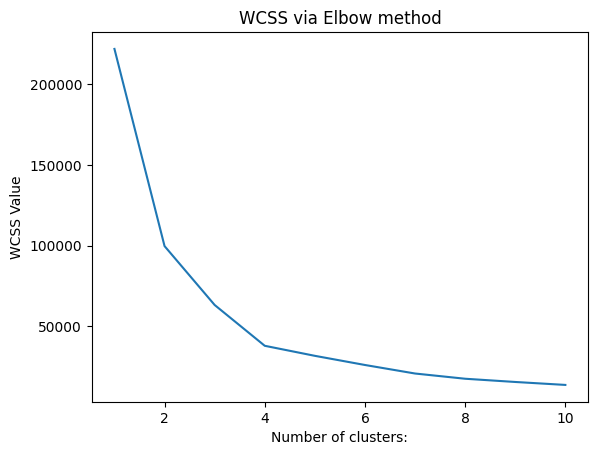

In [5]:
wcss=[]
for i in range(1,11):
  model=KMeans(n_clusters=i,init='k-means++',random_state=21)
  model.fit(x)
  wcss.append(model.inertia_)
plt.plot(range(1,11),wcss)
plt.title('WCSS via Elbow method')
plt.xlabel('Number of clusters:')
plt.ylabel('WCSS Value')
plt.show()

# K-Means Clustering Training on Training set

In [6]:
model = KMeans(n_clusters=4,init='k-means++',random_state=42)
y_means=model.fit_predict(x)
print("y_means:\n\n",y_means)

y_means:

 [3 2 1 2 3 2 1 2 1 2 1 2 1 2 1 2 3 3 1 2 3 2 1 2 1 2 1 3 1 2 1 2 1 2 1 2 1
 2 1 2 0 2 0 3 1 3 0 3 3 3 0 3 3 0 0 0 0 0 3 0 0 3 0 0 0 3 0 0 3 3 0 0 0 0
 0 3 0 3 3 0 0 3 0 0 3 0 0 3 3 0 0 3 0 3 3 3 0 3 0 3 3 0 0 3 0 3 0 0 0 0 0
 3 3 3 3 3 0 0 0 0 3 3 3 2 3 2 0 2 1 2 1 2 3 2 1 2 1 2 1 2 1 2 3 2 1 2 0 2
 1 2 1 2 1 2 1 2 1 2 1 2 0 2 1 2 1 2 1 2 1 3 1 2 1 2 1 2 1 2 1 2 1 2 1 2 0
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# Scattering the Clusters

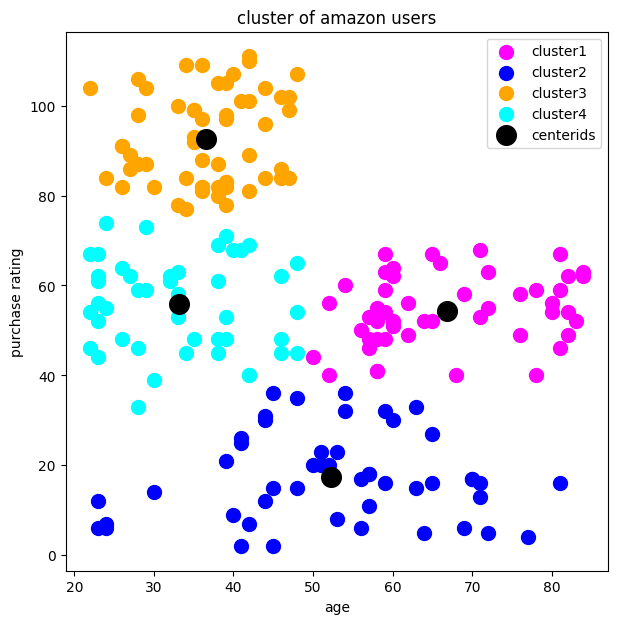

In [7]:
plt.figure(figsize=(7,7))
plt.scatter(x[y_means==0,0],x[y_means==0,1],s=100,c='magenta',label='cluster1')
plt.scatter(x[y_means==1,0],x[y_means==1,1],s=100,c='blue',label='cluster2')
plt.scatter(x[y_means==2,0],x[y_means==2,1],s=100,c='orange',label='cluster3')
plt.scatter(x[y_means==3,0],x[y_means==3,1],s=100,c='cyan',label='cluster4')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s=200,c='black',label='centerids')
plt.title('cluster of amazon users')
plt.xlabel('age')
plt.ylabel('purchase rating')
plt.legend()
plt.show()